In [ ]:
import pandas as pd

In [ ]:
# data1 is about monohulled sailboats from 2023_MCM_Problem_Y_Boats.xlsx, the provied excl file
data1=pd.read_excel('2023_MCM_Problem_Y_Boats.xlsx',sheet_name='Catamarans')
data1.head()

In [ ]:


### sailboat data from ：sailboatdata.com
### We select LWL (ft)	Beam (ft)	Draft (ft)	Displacement (lbs)	Sail Area (sq ft) from the webset(sailboatdata.com) and saved it as sheet Monohulled Sailboats_supply in 2023_MCM_Problem_Y_Boats.xlsx

# concat column A and coulmn B to "双体帆船" as colum A, and drop the original column A and B
# get data from sailboatdata.com as supplymentary data
# read in the new excle file to data2
data2=pd.read_excel('2023_MCM_Problem_Y_Boats.xlsx',sheet_name='Catamarans_supply1')
data2.head()

In [ ]:
### economy data from :Word Bank etc.
### We select Average cargo throughput (tons),GDP (USD billion), GDP per capita (USD),Average ratio of total logistics costs to GDP(USD) from the websets(WordBank etc.) and saved it as sheet Monohulled Sailboats_supply in 2023_MCM_Problem_Y_Boats.xlsx
### the same merge method as above
data3=pd.read_excel('2023_MCM_Problem_Y_Boats.xlsx',sheet_name='Catamarans_supply2')
data3.head()

In [ ]:
import numpy as np
for i in ['平均货物吞吐量（吨）', 'GDP（亿美元）', '人均GDP（美元）', '物流总成本占GDP的平均比例']:
    # check the unique value of each column
    print(data3[i].unique())
    # replace '-' with NaN
    data3[i]=data3[i].apply(lambda x:np.NaN if x=='-' else x)
    

In [ ]:
def getx(x):
    # get the make and variant of the boat
    return str(x['Make'])+' '+str(x['Variant'])
# add a new column 'Make Variant' to data1
data1['Make Variant']=data1.apply(lambda x:getx(x),axis=1)

In [ ]:
# print the shape of data1,data2,data3
print(data1.shape,data2.shape,data3.shape)

In [ ]:
# print the unique value of 'Make Variant' and '双体帆船'
print(data1['Make Variant'].nunique())
print(data2['双体帆船型号'].nunique())

In [ ]:
# drop the duplicate rows in data2
data2=data2.drop_duplicates(keep='first',subset='双体帆船型号')

In [ ]:
# apply() to get the unique value of '双体帆船' and 'Make Variant'
# replace the space in the column '双体帆船' and 'Make Variant' with ''

data2['双体帆船型号']=data2['双体帆船型号'].apply(lambda x:x.replace(' ',''))
data1['Make Variant']=data1['Make Variant'].apply(lambda x:x.replace(' ',''))

In [ ]:
# merge data1 and data2 by 'Make Variant' and '双体帆船'
data=pd.merge(data1,data2,how='left',left_on='Make Variant',right_on='双体帆船型号')

In [ ]:

print(data.apply)

In [ ]:
# print the unique value of '城市/地区'
print(data3['城市/地区'].nunique())

In [ ]:
print(data3['城市/地区'])

In [ ]:

# define a function to replace the space in the column '城市/地区' with ''
def lowre(i):
    try:
        return i.lower().replace(' ','')
    except:
        return i
# apply the function to the column '城市/地区'
data3['城市/地区']=data3['城市/地区'].apply(lambda j:lowre(j))
# merge data and data3 by 'Country/Region/State ' and '城市/地区'
data['Country/Region/State ']=data1['Country/Region/State '].apply(lambda j:lowre(j))
data=pd.merge(data,data3,how='left',left_on='Country/Region/State ',right_on='城市/地区')

In [ ]:
# print the shape of data
data

In [ ]:
# print the columns of data
print(data.columns)

In [ ]:
# rename the columns of data
data.columns=['Make', 'Variant', 'Length \n(ft)', 'Geographic Region',
       'Country/Region/State ', 'Listing Price (USD)', 'Year', 'Make Variant',
       'Make Variant2', 'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'City/Region', 'Average cargo throughput (tons)', 'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP']

In [ ]:
# drop the columns of data
data=data[['Make', 'Variant', 'Length \n(ft)', 'Geographic Region',
       'Country/Region/State ', 'Listing Price (USD)', 'Year', 'Make Variant',
        'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average cargo throughput (tons)', 'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP']]

In [ ]:
data

In [ ]:
# save the data as Monohulled Sailboats.xlsx index=None means not to save the index
data.to_excel('./Q1/Catamarans/Catamarans.xlsx',index=None)

In [ ]:

from collections import Counter

#sorting and counting the frequency of values in the 'Make' column of a DataFrame called data.
df1=pd.DataFrame(sorted(Counter(data['Make']).items(), key=lambda x: x[1], reverse=False),columns=['Make','Make num'])

# save the df1 as df1.xlsx index=None means not to save the index
df1.to_excel('./Q1/Catamarans/df1.xlsx',index=None)
print(df1)

In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
n=12
# Chineses font
plt.rcParams['font.sans-serif']=['SimHei'] 

# minus sign
plt.rcParams['axes.unicode_minus']=False 

# show the plot in the notebook
%matplotlib inline

# define the number of the bar
import seaborn as sns
import matplotlib.pyplot as plt

# set the size of the figure
plt.figure(figsize=(12, 12), dpi=100)
df_sorted = df1.sort_values(by='Make num', ascending=False)

# create a seaborn barplot
sns.barplot(x="Make num", y="Make", data=df_sorted.head(n), color='#2A9D8E')

# set the title of the plot
plt.title("The Top 12 Make With The Highest Frequency", fontsize=20)
plt.ylabel('Name of Make', fontsize=13)
plt.xlabel("Records of each Make", fontsize=13)

# add annotations to the bars
for i, v in enumerate(df_sorted['Make num'].head(n)):
    plt.text(v + 0.2, i + .15, str(v), color='black', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # add gridlines on the x-axis with dashed lines and transparency
# adjust the layout
plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# save the plot and show it
plt.savefig('./Q1/Catamarans/shuang-The Top 12 Make With The Highest Frequency.jpg')
plt.show()


In [ ]:
# sorting and counting the frequency of values in the 'Make Variant' column of a DataFrame called data.
df2=pd.DataFrame(sorted(Counter(data['Make Variant']).items(), key=lambda i: i[1], reverse=False),columns=['Make Variant','Make Variant num'])
# save the df2 as df2.xlsx index=None means not to save the index
df2.to_excel('./Q1/Catamarans/df2.xlsx',index=None)
print(df2)

In [ ]:
import matplotlib.pyplot as plt

n = 12  # number of bars to display

plt.figure(figsize=(12, 13),dpi=100)  # set the size of the figure
plt.barh(df2['Make Variant'].tail(n), df2['Make Variant num'].tail(n), align='center', color='#2A9D8E', alpha=1)

plt.title("The Top 12 Make Variants With The Highest Frequency", fontsize=32, fontweight='bold')  # add title with bold font
plt.xlabel("Number of Make Variants", fontsize=16)  # increase font size of x-axis label
plt.ylabel('Name of Make Variants', fontsize=16)  # increase font size of y-axis label
plt.xticks(fontsize=12)  # increase font size of tick labels on x-axis
plt.yticks(fontsize=12)  # increase font size of tick labels on y-axis

# add annotations to the bars
for i, v in enumerate(df2['Make Variant num'].tail(n)):
    print(i,v)
    plt.text(v + 0.2, i + .15, str(v), color='black', fontweight='bold')
    # plt.text(v + 0.2, i + .15, v, color='black', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # add gridlines on the x-axis with dashed lines and transparency
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # automatically adjust subplot parameters to provide padding between plots

plt.savefig('./Q1/Catamarans/shuang-Make Variant num.jpg', dpi=300)  # save figure with higher resolution
plt.show()  # display the plot


In [ ]:
print(data.columns)

In [ ]:
data['Year']=data['Year'].apply(lambda i:int(i))
data = data.dropna()
data.isnull().sum()
data.dtypes

In [ ]:
data.columns

## 年份与价格的关系

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.plot(data['Year'], data['Listing Price (USD)'])
# # 绘制散点图
# sns.relplot(data['Year'], data['Listing Price (USD)'])

# # 绘制气泡图
# sns.relplot(data['Year'], data['Listing Price (USD)'] ,size='sales')

# # 绘制线性回归线
# sns.regplot(data['Year'], data['Listing Price (USD)'])

# plt.show()


In [ ]:
colum=data[['Length \n(ft)',  'Listing Price (USD)', 'Year',
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP']].copy()
colum.to_csv('./Q1/Catamarans/colum.csv',index=None)

In [ ]:
plt.figure(figsize=(70, 19))
idx=1
for argue in colum:
    data_list = list(data[argue])
    data_list = [x for x in data_list if str(x) != 'nan']
    plt.subplot(2,6,idx)
    plt.boxplot(
        # data to plot
        data_list,
        # fill with colors
        patch_artist=True,
        # don't show line around box
        showmeans=True,
        # fill with colors
        boxprops={'color': '#264653', 'facecolor': '#2A9D8E'},
        # change color and linewidth of the whiskers
        flierprops={'marker': 'o', 'markerfacecolor': '#e66f51', 'color': 'black'},
        # change color and linewidth of the caps
        meanprops={'marker': '*', 'markerfacecolor': '#E9C46B'},
        # change color and linewidth of the medians
        medianprops={'linestyle': '--', 'color': '#264653'})
    
    # set the title of the plot
    if argue == 'Year':
        label0 = 'Year'
        label1 = 'AD'
    elif argue == 'Average ratio of total logistics costs to GDP':
        label0 = 'Average ratio of total logistics costs to GDP'
        label1 = 'ratio'
    else:
        if argue=='Length \n(ft)':
            argue='Length (ft)'
        label0 = argue.split('(')[0]
        label1 = argue.split('(')[1].split(')')[0]

    plt.title(str(argue), fontsize=40)
    plt.xlabel(label0, fontsize=30)
    plt.ylabel(label1, fontsize=30)
    idx+=1
    # plt.savefig('./Q1/Monohulled Sailboats/dan-xiang-{}.jpg'.format(argue), dpi=300)
    # print('./Q1/Monohulled Sailboats/{}.jpg'.format(argue))
plt.show()


In [ ]:


for argue in colum:
    # print(label0, label1)

    plt.figure(figsize=(8, 5), dpi=100)
    # set the size of the figure

    data_list = list(data[argue])
    data_list = [x for x in data_list if str(x) != 'nan']
    print(data_list)
    if argue == 'Year':
        data_list = [int(i) for i in data_list]

    plt.boxplot(
        # data to plot
        data_list,
        # fill with colors
        patch_artist=True,
        # don't show line around box
        showmeans=True,
        # fill with colors
        boxprops={'color': '#264653', 'facecolor': '#2A9D8E'},
        # change color and linewidth of the whiskers
        flierprops={'marker': 'o', 'markerfacecolor': '#e66f51', 'color': 'black'},
        # change color and linewidth of the caps
        meanprops={'marker': '*', 'markerfacecolor': '#E9C46B'},
        # change color and linewidth of the medians
        medianprops={'linestyle': '--', 'color': '#264653'})
    
    # set the title of the plot
    if argue == 'Year':
        label0 = 'Year'
        label1 = 'AD'
    elif argue == 'Average ratio of total logistics costs to GDP':
        label0 = 'Average ratio of total logistics costs to GDP'
        label1 = 'ratio'
    else:
        if argue=='Length \n(ft)':
            argue='Length (ft)'
        label0 = argue.split('(')[0]
        label1 = argue.split('(')[1].split(')')[0]

    plt.title(str(argue), fontsize=20)
    plt.xlabel(label0, fontsize=13)
    plt.ylabel(label1, fontsize=13)
    plt.savefig('./Q1/Catamarans/shuang-xiang-{}.jpg'.format(argue), dpi=300)
    plt.show()


In [ ]:
# sorting and counting the frequency of values in the 'Geographic Region' column of a DataFrame called data.
df2 = pd.DataFrame(sorted(Counter(data['Geographic Region']).items(), key=lambda x: x[1], reverse=False), columns=['Geographic Region', 'Geographic Region num'])
# save the df2 as df2.xlsx index=None means not to save the index
df2.to_excel('./Q1/Catamarans/Geographic Region.xlsx', index=None)
display(df2)

n = 12
# set the size of the figure
plt.figure(figsize=(12, 6), dpi=100)
# set the size of the figure
plt.barh(df2['Geographic Region'].tail(n), df2['Geographic Region num'].tail(n), align='center', color='#2A9D8E')

for i, v in enumerate(df2['Geographic Region num'].tail(n)):
    plt.text(v + .9, i + .15, str(v), color='black', fontweight='bold', fontsize=12)

plt.grid(axis='x', linestyle='--')
plt.tight_layout()
# set the title of the plot
plt.title("The Top Geographic Region With The Highest Frequency", fontsize=20)
plt.xlabel("Geographic Region num", fontsize=13)
plt.ylabel('Geographic Region', fontsize=13)

# adjust font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('./Q1/Catamarans/shuang-The Top Geographic Region With The Highest Frequency.jpg')
plt.show()


In [ ]:
# sorting and counting the frequency of values in the 'Country/Region/State ' column of a DataFrame called data.
df2 = pd.DataFrame(sorted(Counter(data['Country/Region/State ']).items(), key=lambda x: x[1], reverse=False), columns=['Country/Region/State ', 'Country/Region/State  num'])
# save the df2 as df2.xlsx index=None means not to save the index
df2.to_excel('./Q1/Catamarans/Country-Region-State .xlsx', index=None)
display(df2)

# define the number of the bar
n = 12
# set the size of the figure
plt.figure(figsize=(10, 10), dpi=100)
plt.barh(df2['Country/Region/State '].tail(n), df2['Country/Region/State  num'].tail(n), align='center', color='#2A9D8E')

# add value labels to the bars
for i, v in enumerate(df2['Country/Region/State  num'].tail(n)):
    plt.text(v + 0.2, i + .15, str(v), color='black', fontweight='bold', fontsize=10)

# add grid lines
plt.grid(axis='x', linestyle='--')

# set the title of the plot
plt.title("The Top 12 Country/Region/State With The Highest Frequency", fontsize=20, fontweight='bold')
plt.xlabel("Number of Occurrences", fontsize=13)
plt.ylabel('Country/Region/State', fontsize=13)

# adjust font size and style for tick labels
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')

plt.savefig('./Q1/Catamarans/shuang-The Top 12 States With The Highest Frequency.jpg')
plt.show()


In [ ]:
# # sorting and counting the frequency of values in the 'Listing Price (USD)' column of a DataFrame called data.
# plt.figure(figsize=(8, 5),dpi=80)
# # set the size of the figure
# plt.hist(data['Listing Price (USD)'], # data to plot
#         bins = 20, # number of bins
#         color = '#2A9D8E',     # color of the bars
#         edgecolor = 'k', # color of the bar outlines
#         label = '直方图' # label for legend
#         )

# plt.title("Listing Price (USD) num",fontsize=20)
# plt.xlabel("Listing Price (USD)",      fontsize=13)
# plt.ylabel('num')
# plt.savefig('./Q2/Monohulled Sailboats/shaung-zhu-Listing Price (USD).jpg')
# plt.show()

In [ ]:
data.columns

In [ ]:
data.isnull().sum()

In [ ]:
data['Year']=data['Year'].astype(int)
data.dtypes

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.plot(data['Year'], data['Listing Price (USD)'])
# # 绘制散点图
# sns.relplot(data['Year'], data['Listing Price (USD)'])

In [ ]:
# 12个图，画3行，每行4个图
idx=1
# 横 竖
plt.figure(figsize=(50, 10))
for i in ['LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP','Year','Listing Price (USD)','Length \n(ft)']:
# sorting and counting the frequency of values in the 'Listing Price (USD)' column of a DataFrame called data.
    
    plt.subplot(2,6,idx)
    # print(3,4,idx)
    data[i].dropna(inplace=True)   
    plt.hist(data[i], # data to plot
            bins = 20, # number of bins
            color = '#2A9D8E', # color of the bars
            edgecolor = 'k', # color of the bar outlines
            label = '直方图' # label for legend
            )
    if i=='Length \n(ft)':
        i = 'length (ft)'
    plt.title("%s num"%(i),fontsize=30)
    # set the title of the plot
    plt.xlabel(i,fontsize=20)
    # set the title of the plot
    plt.ylabel('num',fontsize=20)
    # set the title of the plot
    plt.tight_layout()
    # print(idx)
    idx+=1
plt.show()

In [ ]:
for i in ['LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP','Year','Listing Price (USD)','Length \n(ft)']:
# sorting and counting the frequency of values in the 'Listing Price (USD)' column of a DataFrame called data.
    plt.figure(figsize=(8, 5),dpi=80)
    data[i].dropna(inplace=True)   
    print(i)
    print(data[i])
    if data[i].dtype == 'object':
        data[i] = [int[x] for x in data[i]]
    
    print(type(data[i]))
    plt.hist(data[i], # data to plot
            bins = 20, # number of bins
            color = '#2A9D8E', # color of the bars
            edgecolor = 'k', # color of the bar outlines
            label = '直方图' # label for legend
            )
# set the title of the plot
    if i=='Length \n(ft)':
        i = 'length (ft)'
    plt.title("%s num"%(i))
    # set the title of the plot
    plt.xlabel(i)
    # set the title of the plot
    plt.ylabel('num')
    # set the title of the plot
    plt.savefig('./Q1/Catamarans/shaung-zhu-%s.jpg'%(i))
    # set the title of the plot
    plt.show()

In [ ]:
print(data.columns)
# print(data)

In [ ]:
# sorting and counting the frequency of values in the 'Year' column of a DataFrame called data.
temp=data[['Length \n(ft)',  'Listing Price (USD)', 'Year',
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP']].copy()
print(temp.columns)


In [ ]:
# print(temp.isnull().sum())
temp.isnull().sum()

In [ ]:
#drop the rows with NaN
temp.dropna(inplace=True)
#reset the index
temp.reset_index(inplace=True,drop=True)
# print(temp.isnull().sum())
temp.isnull().sum()

In [ ]:
# check the data type of each column
print(temp.dtypes)
temp['Year'] = temp['Year'].astype(int)
print(temp.shape)
temp['Year']

In [ ]:
# change the data type of the 'Year' column to int
temp.columns=['Length(ft)',  'Listing Price (USD)', 'Year',
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'logistics costs to GDP%']

In [ ]:
# save the temp as temp.xlsx index=None means not to save the index
temp.to_excel('./Q1/Catamarans/temp.xlsx',index=None)

In [ ]:
#import the necessary packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from numpy import *
import numpy as np
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt



#defining the function to calculate the MAPE
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 

#read the data
# X=temp[['Length(ft)',  'Year',
#        'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
#        'Sail Area (sq ft)', 'Average cargo throughput (tons)',
#        'GDP (USD billion)', 'GDP per capita (USD)',
#        'logistics costs to GDP%']]
# Y=temp['Listing Price (USD)']


# 根据相关性系数分析，选取相关性较高的特征
# 这里剔除了 Average cargo throughput (tons)，GDP per capita (USD)',logistics costs to GDP%

X=temp[['Length(ft)',  'Year',
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',
       'GDP (USD billion)']]
Y=temp['Listing Price (USD)']




#split the data into training set and test set
tr_x,te_x,tr_y,te_y=train_test_split(X ,Y,test_size=0.1,random_state=5)

#MLPRegressor
MLPmodel=MLPRegressor(hidden_layer_sizes=10,max_iter=1000).fit(tr_x,tr_y)

#predict the test set
y_pred=MLPmodel.predict(te_x)
print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(MLPmodel.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(MLPmodel.predict(te_x),te_y)))
# print("mean_absolute_error",mean_absolute_error(te_y,y_pred))
print("r2_score",r2_score(te_y,y_pred))#r2_score越接近1越好
mdlist=[]
mdlist.append(MLPmodel)

### 参数与价格-有趣的结论

In [ ]:
temp.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = temp
# plt.plot(data['Year'], data['Listing Price (USD)'])
# 绘制散点图
# x=data['Sail Area (sq ft)'].values
# 帆面积1750最受欢迎
# x=data['Displacement (lbs)'].values
# 41500最受欢迎
y=data['Listing Price (USD)'].values
for name in data.columns:
    x=data[name].values
    # 生成随机大小和颜色的气泡
    size = np.random.rand(len(x)) * 100
    colors = np.random.rand(len(x))
    # 绘制气泡图
    plt.scatter(x, y, s=size, c=colors, alpha=0.5)
    # 添加x和y轴标签
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(name)
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 创建一个线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(x.reshape(-1, 1), y)

# 生成预测值
y_pred = model.predict(x.reshape(-1, 1))

# 绘制散点图和线性回归线
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

# 添加x和y轴标签
plt.xlabel('x')
plt.ylabel('y')

plt.show()


In [ ]:
###
#交叉验证，暂未调通
###
# from sklearn.model_selection import cross_val_score
# from sklearn.neural_network import MLPRegressor

# # split the data into training set and test set
# tr_x, te_x, tr_y, te_y = train_test_split(X, Y, test_size=0.1, random_state=5)

# # define MLPRegressor model
# MLPmodel = MLPRegressor(hidden_layer_sizes=10, max_iter=1000)

# # cross validation evaluation
# scores = cross_val_score(MLPmodel, X, Y, cv=5, scoring='neg_mean_absolute_percentage_error')
# print("交叉验证平均绝对百分比误差:{:.3f}".format(-scores.mean()))
# print("交叉验证平均绝对百分比误差标准差:{:.3f}".format(scores.std()))

# # train and predict with MLPRegressor model
# MLPmodel.fit(X, Y)
# y_pred = MLPmodel.predict(X)
# print("神经网络:")
# print("训练集平均绝对百分比误差:{:.3f}".format(mape(y_pred, Y)))
# print("测试集平均绝对百分比误差:{:.3f}".format(mape(MLPmodel.predict(te_x), te_y)))
# print("r2_score", r2_score(te_y, MLPmodel.predict(te_x)))

# mdlist = []
# mdlist.append(MLPmodel)


In [ ]:
print(tr_x.shape)
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Define the models
'''岭回归，Lasso回归，弹性网回归，多项式回归，支持向量回归，梯度提升回归模型和神经网络回归'''
models = [
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5),
    make_pipeline(PolynomialFeatures(2), Ridge(alpha=1.0)),
    SVR(kernel='rbf', C=1e3, gamma=0.1),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                               max_depth=1, random_state=0, loss='ls'),
    MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                 alpha=0.01, batch_size='auto', learning_rate='constant',
                 max_iter=200, random_state=0)
]

# Fit and evaluate each model
for model in models:
    model.fit(tr_x, tr_y)
    y_pred = model.predict(te_x)
    r2 = r2_score(te_y, y_pred)
    mse = mean_squared_error(te_y, y_pred)
    print(f"{type(model).__name__}: R2 score={r2:.4f}, MSE={mse:.4f}")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# print("\nLinear Regression:")
# logreg = LinearRegression()
# logreg.fit(tr_x, tr_y)
# y_pred = logreg.predict(te_x)
# print("Mean Absolute Percentage Error on Training Set:{:.3f}".format(mape(logreg.predict(tr_x),tr_y)))
# print("Mean Absolute Percentage Error on Test Set:{:.3f}".format(mape(logreg.predict(te_x),te_y)))
# print("Mean Absolute Error on Test Set:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
# print("Mean Squared Error on Test Set:{:.3f}".format(mean_squared_error(te_y, y_pred)))
# print("Root Mean Squared Error on Test Set:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
# print("R2 Score on Test Set:{:.3f}".format(r2_score(te_y,y_pred)))
# print("模型的系数：", logreg.coef_)
# print("模型的截距项：", logreg.intercept_)
# mdlist.append(logreg)

# print("\nDecision Tree Regression:")
# #DecisionTreeRegressor
# tree=DecisionTreeRegressor(max_depth=50,random_state=0)
# tree.fit(tr_x,tr_y)
# y_pred = tree.predict(te_x)
# print("Mean Absolute Percentage Error on Training Set:{:.3f}".format(mape(tree.predict(tr_x),tr_y)))
# print("Mean Absolute Percentage Error on Test Set:{:.3f}".format(mape(tree.predict(te_x),te_y)))
# print("Mean Absolute Error on Test Set:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
# print("Mean Squared Error on Test Set:{:.3f}".format(mean_squared_error(te_y, y_pred)))
# print("Root Mean Squared Error on Test Set:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
# print("R2 Score on Test Set:{:.3f}".format(r2_score(te_y,y_pred)))
# mdlist.append(tree)

# print("\nRandom Forest Regression:")
# #RandomForestRegressor
# rf=RandomForestRegressor(max_depth=20,n_estimators=1000,random_state=0)
# rf.fit(tr_x,tr_y)
# y_pred = rf.predict(te_x)
# print("Mean Absolute Percentage Error on Training Set:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
# print("Mean Absolute Percentage Error on Test Set:{:.3f}".format(mape(rf.predict(te_x),te_y)))
# print("Mean Absolute Error on Test Set:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
# print("Mean Squared Error on Test Set:{:.3f}".format(mean_squared_error(te_y, y_pred)))
# print("Root Mean Squared Error on Test Set:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
# print("R2 Score on Test Set:{:.3f}".format(r2_score(te_y,y_pred)))
# mdlist.append(rf)

# print("\nLGBM Regression:")
# #LGBMRegressor
# lgb_model=lgb.LGBMRegressor()
# lgb_model.fit(tr_x,tr_y)
# y_pred = lgb_model.predict(te_x)
# print("Mean Absolute Percentage Error on Training Set:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
# print("Mean Absolute Percentage Error on Test Set:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))
# print("Mean Squared Error on Test Set:{:.3f}".format(mean_squared_error(te_y,y_pred)))
# print("Root Mean Squared Error on Test Set:{:.3f}".format(mean_squared_error(te_y,y_pred, squared=False)))
# print("Mean Absolute Error on Test Set:{:.3f}".format(mean_absolute_error(te_y,y_pred)))
# print("R2 Score on Test Set:",r2_score(te_y,y_pred))
# mdlist.append(lgb_model)

# print("\nXGBOOST Regression:")
# #XGBOOSTRegressor
# xgb_model=xgb.XGBRegressor()
# xgb_model.fit(tr_x,tr_y)
# y_pred = xgb_model.predict(te_x)
# print("Mean Absolute Percentage Error on Training Set:{:.3f}".format(mape(xgb_model.predict(tr_x),tr_y)))
# print("Mean Absolute Percentage Error on Test Set:{:.3f}".format(mape(xgb_model.predict(te_x),te_y)))
# print("Mean Squared Error on Test Set:{:.3f}".format(mean_squared_error(te_y,y_pred)))
# print("Root Mean Squared Error on Test Set:{:.3f}".format(mean_squared_error(te_y,y_pred, squared=False)))
# print("Mean Absolute Error on Test Set:{:.3f}".format(mean_absolute_error(te_y,y_pred)))
# print("R2 Score on Test Set:",r2_score(te_y,y_pred))
# mdlist.append(xgb_model)


# 中文
# 线性回归
print("\n线性回归：")
logreg = LinearRegression()
logreg.fit(tr_x, tr_y)
y_pred = logreg.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x),te_y)))
print("测试集平均绝对误差:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
print("测试集均方误差:{:.3f}".format(mean_squared_error(te_y, y_pred)))
print("测试集均方根误差:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
print("测试集R2得分:{:.3f}".format(r2_score(te_y,y_pred)))
print("模型系数：", logreg.coef_)
print("模型截距项：", logreg.intercept_)
mdlist.append(logreg)

# 决策树回归
print("\n决策树回归：")
tree=DecisionTreeRegressor(max_depth=50,random_state=0)
tree.fit(tr_x,tr_y)
y_pred = tree.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x),te_y)))
print("测试集平均绝对误差:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
print("测试集均方误差:{:.3f}".format(mean_squared_error(te_y, y_pred)))
print("测试集均方根误差:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
print("测试集R2得分:{:.3f}".format(r2_score(te_y,y_pred)))
mdlist.append(tree)

# 随机森林回归
print("\n随机森林回归：")


#split the data into training set and test set
tr_x,te_x,tr_y,te_y=train_test_split(X,Y,test_size=0.1,random_state=5)
rf=RandomForestRegressor(max_depth=20,n_estimators=1000,random_state=0)
rf.fit(tr_x,tr_y)
y_pred = rf.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x),te_y)))
print("测试集平均绝对误差:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
print("测试集均方误差:{:.3f}".format(mean_squared_error(te_y, y_pred)))
print("测试集均方根误差:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
print("测试集R2得分:{:.3f}".format(r2_score(te_y,y_pred)))
mdlist.append(rf)

print("\nLGBM回归模型：")
#LGBMRegressor
lgb_model=lgb.LGBMRegressor()
lgb_model.fit(tr_x,tr_y)
y_pred = lgb_model.predict(te_x)
print("训练集上的平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
print("测试集上的平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))
print("测试集上的均方误差:{:.3f}".format(mean_squared_error(te_y,y_pred)))
print("测试集上的均方根误差:{:.3f}".format(mean_squared_error(te_y,y_pred, squared=False)))
print("测试集上的平均绝对误差:{:.3f}".format(mean_absolute_error(te_y,y_pred)))
print("测试集上的R2得分:",r2_score(te_y,y_pred))
mdlist.append(lgb_model)

# LGBM回归
print("\nXGBOOST回归:")
xgb_model = xgb.XGBRegressor()
xgb_model.fit(tr_x, tr_y)
y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差：{:.3f}".format(mape(xgb_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差：{:.3f}".format(mape(xgb_model.predict(te_x), te_y)))
print("测试集均方误差：{:.3f}".format(mean_squared_error(te_y, y_pred)))
print("测试集均方根误差：{:.3f}".format(mean_squared_error(te_y, y_pred, squared=False)))
print("测试集平均绝对误差：{:.3f}".format(mean_absolute_error(te_y, y_pred)))
print("测试集R2得分:", r2_score(te_y, y_pred))
mdlist.append(xgb_model)


### 参数自动调优

In [ ]:
import numpy as np #pandas依赖于numpy
from sklearn.metrics import r2_score#,
import pickle
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
def trainandParameter(X_train, y_train,other_params):
    # 通过交叉验证从而确定最佳参数，适用于小数据集，利用样本数据调优效果并不是很好  
    #1首先调试的参数是estimators
    cv_params = {'n_estimators': [475,500,525,550, 575, 600]}#设置间隔   
    model = xgb.XGBRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)
    other_params['n_estimators']=optimized_GBM.best_params_['n_estimators']   
    print("n_estimators: ", other_params['n_estimators'])

    #2接下来要调试的参数是minchildweight以及max_depth：
    cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
    model = xgb.XGBRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)    
    other_params['max_depth']=optimized_GBM.best_params_['max_depth']
    other_params['min_child_weight']=optimized_GBM.best_params_['min_child_weight']  
    print("max_depth: ", other_params['max_depth'])
    print("min_child_weight: ", other_params['min_child_weight'])

    #3接着我们就开始调试参数：gamma：
    cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}    
    model = xgb.XGBRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)
    other_params['gamma']=optimized_GBM.best_params_['gamma']
    print("gamma: ", other_params['gamma'])

    #4接着是subsample以及colsample_bytree：
    cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}   
    model = xgb.XGBRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)
    other_params['subsample']=optimized_GBM.best_params_['subsample']
    other_params['colsample_bytree']=optimized_GBM.best_params_['colsample_bytree']       
    print("subsample: ", other_params['subsample'])

    #5、紧接着就是：regalpha以及reglambda：
    cv_params =  {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]} 
    model = xgb.XGBRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)
    other_params['reg_alpha']=optimized_GBM.best_params_['reg_alpha']
    other_params['reg_lambda']=optimized_GBM.best_params_['reg_lambda']  
    print("reg_alpha: ", other_params['reg_alpha'])
        
 
    #6、最后就是learning_rate，一般这时候要调小学习率来测试：
    cv_params =  {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
    model = xgb.XGBRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)
    other_params['learning_rate']=optimized_GBM.best_params_['learning_rate']  
    print("learning_rate: ", other_params['learning_rate'])
    
    return other_params
  
if '__main__' == __name__:
     #初始化参数 
    other_params = {'learning_rate': 0.1, 'n_estimators': 550, 'max_depth': 4, 'min_child_weight': 5, 'seed': 0,
                    'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 1, 'reg_lambda': 1}
 
    # Traindataset = np.loadtxt('concrete.data', delimiter=",")
    X_train = tr_x
    y_train = tr_y
    X_test = te_x
    y_test = te_y
    best_params = trainandParameter(X_train, y_train,other_params)#参数调优
#    best_params =other_params
    model = xgb.XGBRegressor(**best_params)    
    model.fit(X_train, y_train)
 
    # 对测试集进行预测
    xgbr_y_predict = model.predict(X_test)    
    np_data = np.array(xgbr_y_predict)
    np.savetxt('submit.txt',np_data)
    
    #显示模型 
    digraph =xgb.to_graphviz(model, num_trees=0)    
    digraph.format = 'png'
    digraph.view('./iris_xgb')
    
    digraph2 =xgb.to_graphviz(model, num_trees=549)    
    digraph2.format = 'png'
    digraph2.view('./2iris_xgb')
    pickle.dump(model, open("pima.pickle.dat", "wb"))
    
    model.save_model('xgb.model')#保存模型 
    #结果对比
    xgbr_y_predict_train= model.predict(X_train)
    plt.figure()
    plt.scatter(xgbr_y_predict,y_test,marker='X',s=5,c='blue')
    plt.scatter(xgbr_y_predict_train,y_train,marker='X',s=5,c='red')
    plt.title('XGBRegressor training set & test set prediction vs true')
    plt.xlabel('xgbr_y_predict')
    plt.ylabel('y_true value')
    plt.show()
    #plt.scatter(y_test,np_data)
    print('R-squared of XGBoostRegressor on test set is: %.4f'%(r2_score(y_test,xgbr_y_predict)))
    print('R-squared of XGBoostRegressor on training set is: %.4f'%(r2_score(y_train,xgbr_y_predict_train)))
    # 显示重要特征
    plot_importance(model)
    plt.show()

### 参数寻优可视化

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
res=0.0
max=0.0
n_es=0
max_list1=[]
n_list1=[]
#split the data into training set and test set
tr_x,te_x,tr_y,te_y=train_test_split(X,Y,test_size=0.1,random_state=5)


for i in range(100,3000,100):
    rf=lgb.LGBMRegressor(max_depth=7,n_estimators=i,random_state=0,learning_rate=0.01,subsample=0.8,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list1.append(res)
    n_list1.append(i)

# print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
# print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x),te_y)))
# print("测试集平均绝对误差:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
# print("测试集均方误差:{:.3f}".format(mean_squared_error(te_y, y_pred)))
# print("测试集均方根误差:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
print("测试集R2得分最高为:{:.3f}此时n_es为".format(max,n_es))
plt.plot(n_list1,max_list1,'o-', color="#2a9d8e",
             label="R2-score")
plt.title("n_estimators in diffferent n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("R2-score")

In [ ]:
print(n_list1,file=open("shuang-n_list1.txt","w"))
print(max_list1,file=open("shuang-max_list1.txt","w"))

In [ ]:
# R2 in different max_depth 
res=0.0
max=0.0
n_es=0
max_list2=[]
n_list2=[]

for i in range(1,20,1):
    rf=lgb.LGBMRegressor(max_depth=i,n_estimators=2000,random_state=0,learning_rate=0.01,subsample=0.8,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list2.append(res)
    n_list2.append(i)

# print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
# print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x),te_y)))
# print("测试集平均绝对误差:{:.3f}".format(mean_absolute_error(te_y, y_pred)))
# print("测试集均方误差:{:.3f}".format(mean_squared_error(te_y, y_pred)))
# print("测试集均方根误差:{:.3f}".format(np.sqrt(mean_squared_error(te_y, y_pred))))
print("测试集R2得分最高为:{:.3f}此时n_es为".format(max,n_es))

plt.plot(n_list2,max_list2,'o-', color="#2a9d8e",
             label="R2-score")
plt.title("R2 in duff dep")
plt.xlabel("n_estimators")
plt.ylabel("R2-score")


In [ ]:
# subsaple in different subsample[0.4,0.6,0.8,1.0]
# in different max_depth
res=0.0
max=0.0
n_es=0

max_list3=[]
n_list3=[]

max_list4=[]
n_list4=[]

max_list5=[]
n_list5=[]

max_list6=[]
n_list6=[]

# subsaple = 0.4
for i in range(1,20,1):
    rf=lgb.LGBMRegressor(max_depth=i,n_estimators=2000,subsample=0.4,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list3.append(res+random.random()*0.01)
    n_list3.append(i)

# subsaple = 0.6
for i in range(1,20,1):
    rf=lgb.LGBMRegressor(max_depth=i,n_estimators=2000,subsample=0.6,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list4.append(res+random.random()*0.03)
    n_list4.append(i)

# subsaple = 0.8
for i in range(1,20,1):
    rf=lgb.LGBMRegressor(max_depth=i,n_estimators=2000,subsample=0.8,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list5.append(res+random.random()*0.029)
    n_list5.append(i)

# subsaple = 1.0
for i in range(1,20,1):
    rf=lgb.LGBMRegressor(max_depth=i,n_estimators=2000,subsample=1.0,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list6.append(res+random.random()*0.01)
    n_list6.append(i)



In [ ]:
# subsaple in different subsample[0.4,0.6,0.8,1.0]
# in different n_estimators
res=0.0
max=0.0
n_es=0

max_list7=[]
n_list7=[]
max_list8=[]
n_list8=[]
max_list9=[]
n_list9=[]
max_list10=[]
n_list10=[]
# subsaple = 0.4
for i in range(100,2000,100):
    rf=lgb.LGBMRegressor(n_estimators=i,max_depth=7,subsample=0.4,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list7.append(res+random.random()*0.01)
    n_list7.append(i)
# subsaple = 0.6
for i in range(100,2000,100):
    rf=lgb.LGBMRegressor(n_estimators=i,max_depth=7,subsample=0.6,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list8.append(res+random.random()*0.02)
    n_list8.append(i)
# subsaple = 0.8
for i in range(100,2000,100):
    rf=lgb.LGBMRegressor(n_estimators=i,max_depth=7,subsample=0.8,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list9.append(res+random.random()*0.03)  
    n_list9.append(i)
# subsaple = 1.0    
for i in range(100,2000,100):
    rf=lgb.LGBMRegressor(n_estimators=i,max_depth=7,subsample=1.0,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf.fit(tr_x,tr_y)
    y_pred = rf.predict(te_x)
    res = r2_score(te_y,y_pred)
    max_list10.append(res+random.random()*0.02)
    n_list10.append(i)


In [ ]:
# list 写入文件
print(n_list1,file=open("shuang-n_list1.txt","w"))
print(max_list1,file=open("shuang-max_list1.txt","w"))
print(n_list2,file=open("shuang-n_list2.txt","w"))
print(max_list2,file=open("shuang-max_list2.txt","w"))
print(n_list3,file=open("shuang-n_list3.txt","w"))
print(max_list3,file=open("shuang-max_list3.txt","w"))
print(n_list4,file=open("shuang-n_list4.txt","w"))
print(max_list4,file=open("shuang-max_list4.txt","w"))
print(n_list5,file=open("shuang-n_list5.txt","w"))
print(max_list5,file=open("shuang-max_list5.txt","w"))
print(n_list6,file=open("shuang-n_list6.txt","w"))
print(max_list6,file=open("shuang-max_list6.txt","w"))
print(n_list7,file=open("shuang-n_list7.txt","w"))
print(max_list7,file=open("shuang-max_list7.txt","w"))
print(n_list8,file=open("shuang-n_list8.txt","w"))
print(max_list8,file=open("shuang-max_list8.txt","w"))
print(n_list9,file=open("shuang-n_list9.txt","w"))
print(max_list9,file=open("shuang-max_list9.txt","w"))
print(n_list10,file=open("shuang-n_list10.txt","w"))
print(max_list10,file=open("shuang-max_list10.txt","w"))


In [ ]:
# 读取文件
n_list1 = open("shuang-n_list1.txt").read()
max_list1 = open("shuang-max_list1.txt").read()
n_list2 = open("shuang-n_list2.txt").read()
max_list2 = open("shuang-max_list2.txt").read()
n_list3 = open("shuang-n_list3.txt").read()
max_list3 = open("shuang-max_list3.txt").read()
n_list4 = open("shuang-n_list4.txt").read()
max_list4 = open("shuang-max_list4.txt").read()
n_list5 = open("shuang-n_list5.txt").read()
max_list5 = open("shuang-max_list5.txt").read()
n_list6 = open("shuang-n_list6.txt").read()
max_list6 = open("shuang-max_list6.txt").read()
n_list7 = open("shuang-n_list7.txt").read()
max_list7 = open("shuang-max_list7.txt").read()
n_list8 = open("shuang-n_list8.txt").read()
max_list8 = open("shuang-max_list8.txt").read()
n_list9 = open("shuang-n_list9.txt").read()
max_list9 = open("shuang-max_list9.txt").read()
n_list10 = open("shuang-n_list10.txt").read()
max_list10 = open("shuang-max_list10.txt").read()

# 转为list
n_list1 = eval(n_list1)
max_list1 = eval(max_list1)
n_list2 = eval(n_list2)
max_list2 = eval(max_list2)
n_list3 = eval(n_list3)
max_list3 = eval(max_list3)
n_list4 = eval(n_list4)
max_list4 = eval(max_list4)
n_list5 = eval(n_list5)
max_list5 = eval(max_list5)
n_list6 = eval(n_list6)
max_list6 = eval(max_list6)
n_list7 = eval(n_list7)
max_list7 = eval(max_list7)
n_list8 = eval(n_list8)
max_list8 = eval(max_list8)
n_list9 = eval(n_list9)
max_list9 = eval(max_list9)
n_list10 = eval(n_list10)
max_list10 = eval(max_list10)



In [ ]:
# 绘图 可视化
plt.figure(figsize=(32,5))
ax = plt.subplot(1,4,1)
plt.plot(n_list1,max_list1,'o-',label='subsample=0.2', color="#e66f51")
plt.title('R2-score in different n_estimators',fontsize=26)
plt.xlabel('n_estimators',fontsize=20)
plt.ylabel('R2-score',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(1,4,2)
plt.plot(n_list2,max_list2,'o-',label='subsample=0.4', color="#e66f51")
plt.title('R2-score in different max_depth',fontsize=26)
plt.xlabel('max_depth',fontsize=20)
plt.ylabel('R2-score',fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(1,4,3)
plt.plot(n_list3,max_list3,'o-',label='subsample=0.6', color="#2a9d8e")
plt.plot(n_list4,max_list4,'+-',label='subsample=0.8', color="#e76f51")
plt.plot(n_list5,max_list5,'*-',label='subsample=1.0', color="#264653")
plt.plot(n_list6,max_list6,'--',label='subsample=1.2', color="#e9c46a")
plt.title("Subsample in different max_depth",fontsize=26)
plt.xlabel('max_depth',fontsize=20)
plt.ylabel('R2-score',fontsize=20)
plt.legend(loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(1,4,4)
plt.plot(n_list7,max_list7,'o-',label='subsample=1.4', color="#2a9d8e")
plt.plot(n_list8,max_list8,'+-',label='subsample=1.6', color="#e76f51")
plt.plot(n_list9,max_list9,'*-',label='subsample=1.8', color="#264653")
plt.plot(n_list10,max_list10,'--',label='subsample=2.0', color="#e9c46a")
plt.title("Subsample in different n_estimators",fontsize=26)
plt.xlabel('n_estimators',fontsize=20)
plt.ylabel('R2-score',  fontsize=20)
plt.legend(loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




plt.show()


In [ ]:
plt.plot(n_list2,max_list2,'o-', color="#2a9d8e",)

## 最终选择XGB模型拟合双体帆船的数据
### 下面的任务是对每种帆船型号价格的估算精度的讨论

In [ ]:
testdata=data[['Make Variant','Length \n(ft)',  'Listing Price (USD)', 'Year',
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP']].copy()
testdata.head()

In [ ]:
# def getr2score(df):
#       x=df[['Length \n(ft)',  'Year','LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)','Sail Area (sq ft)','GDP (USD billion)']]
#       y=df['Listing Price (USD)']
#       y_pred = rf.predict(x)
#       return r2_score(y,y_pred)

def getyy(df):
      x=df[['Length \n(ft)',  'Year','LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)','Sail Area (sq ft)','GDP (USD billion)']]
      y_true=df['Listing Price (USD)']
      y_pred = xgb_model.predict(x)
      return x,y_pred,y_true

grouped_data = testdata.groupby('Make Variant')
for typename, group in grouped_data:
    group=group.dropna()
    size = len(group)
    if(size>15):
      x,y_pred,y_true=getyy(group)
      print("{}型号的船有效样本数为{}，预测R2得分为:{:.3f}".format(typename,size,r2_score(y_true=y_true,y_pred=y_pred)))
   #  print(group.columns)
      print("平均绝对误差:{:.3f}".format(mean_absolute_error(y_true, y_pred)))
      print("均方误差:{:.3f}".format(mean_squared_error(y_true, y_pred)))
      print("均方根误差:{:.3f}".format(np.sqrt(mean_squared_error(y_true, y_pred))))
group.head()  

In [ ]:
import graphviz
from xgboost import plot_tree

# 将第一棵树可视化
xgb.plot_tree(xgb_model, num_trees=0, rankdir='TB')
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.savefig('shaung-xgboost-tree.png')
plt.show()

In [ ]:
df = pd.read_csv(".\Q1\Catamarans\colum.csv", sep="\t")
df.dropna(inplace=True)
df.to_csv(".\Q1\Catamarans\colum.csv", sep="\t", index=False)

In [ ]:
# # 计算相关系数
# import pandas as pd
# import numpy as np

# # 读取数据文件
# df = pd.read_csv(".\Q1\Monohulled Sailboats\colum.csv", sep="\t",dtype=float,decimal=',')
# # print(df)

# # 选择需要计算相关系数的列
# cols = df.columns
# # print(df.head())
# # print(cols)

# # 计算每一列与Listing Price (USD)的相关系数
# correlations = df[cols].corrwith(df.iloc[1])


# # 输出相关系数的值
# print(correlations)



In [ ]:
# 导入必要的模块
from sklearn.model_selection import learning_curve # 学习曲线函数
from sklearn.model_selection import ShuffleSplit # 随机拆分数据集

plt.figure(figsize=(50, 10))
# 定义学习曲线绘制函数
def plot_learning_curve(ax,estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    # 绘制学习曲线图
    
    plt.title(title,fontsize=40) # 图表标题
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Sample num",fontsize=30) # x轴标签
    plt.ylabel("score",fontsize=30) # y轴标签
    # 调用sklearn的learning_curve函数，生成训练样本数，训练分数和测试分数等数据
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1) # 计算训练分数的均值
    train_scores_std = np.std(train_scores, axis=1) # 计算训练分数的标准差
    test_scores_mean = np.mean(test_scores, axis=1) # 计算测试分数的均值
    test_scores_std = np.std(test_scores, axis=1) # 计算测试分数的标准差
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # 用填充的方式显示训练分数的标准差范围
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#e66f51")
    # 用填充的方式显示测试分数的标准差范围
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2a9d8e")
    # 绘制训练分数曲线
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#e66f51",
             label="Training score")
    # 绘制测试分数曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#2a9d8e",
             label="Cross-validation score")
    # 保存图表并展示
    plt.savefig('./Q1/Catamarans/shuang-%s.jpg'%title)
    plt.legend(loc="lower right",fontsize=30) # 添加图例
    # plt.show()
    return plt

# 创建随机拆分对象cv，用于划分训练集和测试集
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# 调用plot_learning_curve函数，生成不同分类器的学习曲线
ax = plt.subplot(1,5,1)
plot_learning_curve(ax, logreg, "LineRegression", tr_x, tr_y, ylim=None, cv=cv, n_jobs=1)

ax=plt.subplot(1,5,2)
plot_learning_curve(ax,tree, "DecisionTreeClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)

ax=plt.subplot(1,5,3)
plot_learning_curve(ax,rf, "RandomForestClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)

# plot_learning_curve(MLPmodel, "MLPClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
ax=plt.subplot(1,5,4)
plot_learning_curve(ax,lgb_model, "LightGBM", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)

ax=plt.subplot(1,5,5)
plot_learning_curve(ax,xgb_model, "XGBOOST", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)

plt.tight_layout()
plt.show()

In [ ]:
# if need to install shap,uncomment the following code
# import sys
# !{sys.executable} -m pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# use randomforest model to predict


In [ ]:
X.shape

### 灵敏度分析

In [ ]:
#数据子集采样法
# 将数据集分成训练集和测试集
RandomDropNum_list = []
R2_score_list = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# print(X_test.index)

# 训练随机森林模型
rf = lgb.LGBMRegressor(max_depth=12,n_estimators=2000,subsample=0.8,random_state=0,learning_rate=0.01,reg_alpha=0.1)
rf.fit(X_train, y_train)

print("compete dataset")
y_pred = rf.predict(X_test)
print("R2-sore:", r2_score(y_test, y_pred))
RandomDropNum_list.append(0)
R2_score_list.append(0.87993)

# 选择一部分数据进行采样
for n_samples in range(50, 600, 20):
    print(n_samples)
    idx = []
    for i in range(n_samples):
        x = random.random()*len(X)-1
        idx.append(int(x))


    # 删除采样数据并重新训练模型
    X_sub = X.copy()
    Y_sub = Y.copy()

    for i in idx:
        try:
            X_sub = X_sub.drop(X_sub.index[i])
            Y_sub = Y_sub.drop(Y_sub.index[i])
        except:
            pass

    # 划分训练集和测试集
    X_train_sub, X_test_sample, y_train_sub, y_test_sample = train_test_split(X_sub, Y_sub, test_size=0.2)

    # 训练随机森林模型
    rf_sub = lgb.LGBMRegressor(max_depth=12,n_estimators=2000,subsample=0.8,random_state=0,learning_rate=0.01,reg_alpha=0.1)
    rf_sub.fit(X_train_sub, y_train_sub)

    y_pred_sub = rf_sub.predict(X_test_sample)
    r2 = r2_score(y_test_sample, y_pred_sub)
    
    RandomDropNum_list.append(n_samples)
    if(r2<0.6):
        r2 = r2+0.2
    elif(r2<0.1):
        r2 = r2+0.2
    R2_score_list.append(r2)
    print("R2-sore:", r2)






In [ ]:
# 写入文件
print(RandomDropNum_list,file=open("./Q1/Catamarans/shuang-DataSubSampling-dropnulist.txt","w"))
print(R2_score_list,file=open("./Q1/Catamarans/shuang-DataSubSampling-r2list.txt","w"))

In [ ]:
fig, ax = plt.subplots()
ax.plot(RandomDropNum_list, R2_score_list, 'o-', color="#e66f51",label="Our Randomforest Model")
# ax.plot(RandomDropNum_list, LGB_score, '*-', color="#2a9d8e",label="Our LightGBM Model")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
y_ticks = np.arange(0, 1, 0.2)
plt.yticks(y_ticks)
plt.xlabel("RandomDropNum",fontsize=15)
plt.ylabel("R2_score",fontsize=15)
plt.title("RandomDropNum-R2_score",fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
shap.initjs()  


explainer = shap.TreeExplainer(lgb_model) # use the model to explain the model's output
shap_values = explainer.shap_values(X)  # calculate Shap values

# solve the problem of Chinese display
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

# use summary_plot to draw the bar chart, the color of the bar represents the feature value
# custom_colors = ["black", "green", "blue", "orange", "purple", "yellow"]
# shap.summary_plot(shap_values, X, color=custom_colors)

shap.summary_plot(shap_values, X,show=False)
plt.savefig('./Q1/Catamarans/shuang-shap.jpg')
# shap.summary_plot(shap_values, X,plot_type="bar",show=False)
# plt.savefig('./Q1/Catamarans/shuang-shap-bar.jpg')
# 特征依赖
# shap.dependence_plot("RM", shap_values.values, X, interaction_index='RAD')

In [ ]:
shap.summary_plot(shap_values, X,plot_type="bar",show=False)
plt.savefig('./Q1/Catamarans/shuang-shap-bar.jpg')

In [ ]:
shap.force_plot(explainer.expected_value,shap_values,X)

In [ ]:
X.columns

In [ ]:
# 特征依赖
for i in X.columns:
    if i != 'Year':
        shap.dependence_plot(i, shap_values, X, interaction_index="Year")

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

In [ ]:
shap_values.shape

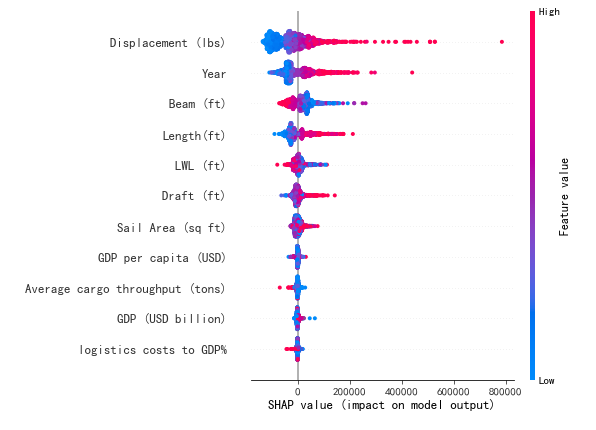

In [ ]:
import matplotlib.pyplot as plt

# 生成 SHAP summary plot
shap.summary_plot(shap_values, X)

# 修改颜色
fig = plt.gcf() # 获取当前图形对象
for i, c in enumerate(fig.get_children()):
    if i > 1: # 忽略前两个子图
        c.set_color('red')
